# Electrical circuit
An electrical circuit is a path in which electrons from a voltage or current source flow.


The point where those electrons enter an electrical circuit is called the "source" of electrons. The point where the electrons leave an electrical circuit is called the "return" or "earth ground". The exit point is called the "return" because electrons always end up at the source when they complete the path of an electrical circuit.

Electronic circuits usually use direct current sources. The load of an electronic circuit may be as simple as a few resistors, capacitors, and a lamp, all connected together to create the flash in a camera. Or an electronic circuit can be complicated, connecting thousands of resistors, capacitors, and transistors. It may be an integrated circuit such as the microprocessor in a computer.

**Kirchhoff's laws** are fundamental to circuit theory. They quantify how current flows through a circuit and how voltage varies around a loop in a circuit.

**Kirchhoff's current law (1st Law)** states that current flowing into a node (or a junction) must be equal to current flowing out of it. This is a consequence of charge conservation.

**Kirchhoff's voltage law (2nd Law)** states that the sum of all voltages around any closed loop in a circuit must equal zero. This is a consequence of charge conservation and also conservation of energy.

# Problem
This circuit has the following data. And we must find the unknown:
**i1; i2; i3; i4; i5**

The algebraic sum of the changes in potential encountered in a complete traversal of a closed circuit loop must be zero.

<img src="1.png" />

We can represent following scheme like Linear equation system.

\begin{bmatrix} 
   -V_1 & {}+{} &  R_1i_1 & {}+{} & R_2(i_1 - i_2) & {}={} & 0 \\
    R_2(i_2-i_1) & {}+{} &  R_3i_2 & {}+{} &  R_4(i_2-i_3) & {}={} &  0 \\
    R_4(i_3-i_2) & {}+{} & R_5i_3 & {}+{} & V_2 & {}={} & 0
\end{bmatrix}

After our calculation we have next view.

\begin{align}
A &= \begin{bmatrix}
R_1 + R_2 & -R_2 & 0 \\
-R_2 & R_2+R_3+R_4 & -R_4 \\
0 & -R_4 & R_4+R_5
\end{bmatrix}
\end{align}

\begin{align}
B &= \begin{bmatrix}
V_1 \\
0 \\
-V_2
\end{bmatrix}
&
X &= \begin{bmatrix}
i_1 \\
i_2 \\
i_3
\end{bmatrix}
\end{align}

One way to find the unknowns is to use the matrix method to solve a system of linear equations.
Where A = matrix of resistors and B = matrix of voltage.
$$ X = A^{-1}B $$
 


## Using the sympy library.

In [59]:
import numpy as np; import sympy as sym; import networkx as nx

In [69]:
sym.init_printing()
i1,i2,i3 = sym.symbols('I1,I2,I3')

R1 = 3; R2 = 4; R3 = 5; R4= 2; R5 = 6;
V1 = 2; V2 = 2;

In [70]:
f = sym.Eq(R1 * i1 + R2 *(i1 - i2), V1)
g = sym.Eq(R2 * (i2 - i1) + R3 * i2 + R4 * (i2 - i3), 0)
h = sym.Eq(R4 * (i3 - i2) + R5 * i3, -V2)

print(f); print(g); print(h)

sym.solve([f,g,h])

Eq(7*I1 - 4*I2, 2)
Eq(-4*I1 + 11*I2 - 2*I3, 0)
Eq(-2*I2 + 8*I3, -2)


## Using the numpy library.

In [62]:
x1 = R1 + R2; x2 = R2 + R3 + R4; x3 = R4 + R5; z = 0
A = np.array([ [x1,-R2,z], [-R2, x2,-R4], [z,-R4,x3] ])
B = np.array([V1,z,-V2])

print('Matrix A'); print(A); print('____________')
print('Matrix B'); print(B); print('____________')

det_A = round(np.linalg.det(A), 3); print('det A = ', det_A); print('____________')

A_inv = np.linalg.inv(A); print('A inverse matrix = '); print(A_inv); print('____________')

result = A_inv.dot(B); print('Answer: ', 'i1 = ', result[0], ';', 'i2 = ', result[1],';', 'i3 = ', result[2],';')

i1 = result[0]; i2 = result[1]; i3 = result[2]

Matrix A
[[ 7 -4  0]
 [-4 11 -2]
 [ 0 -2  8]]
____________
Matrix B
[ 2  0 -2]
____________
det A =  460.0
____________
A inverse matrix = 
[[0.1826087  0.06956522 0.0173913 ]
 [0.06956522 0.12173913 0.03043478]
 [0.0173913  0.03043478 0.1326087 ]]
____________
Answer:  i1 =  0.33043478260869563 ; i2 =  0.07826086956521738 ; i3 =  -0.23043478260869563 ;


Now we can find next two unknowns:

$$i_3 = i_1 - i_2$$
$$i_5 = i_2 - i_4$$

Now we round up our results for a more compact look.

In [67]:
I1 = round(i1, 3); I2 = round(i2, 3); I3 = round(I1-I2, 3); I4 = round(i3, 3); I5 = round(I2 - I4, 3)
print('Answer: '); print('i1 =', I1, 'i2 =', I2, 'i3 =', I3, 'i4 =', I4, 'i5 =', I5)

Answer: 
i1 = 0.33 i2 = 0.078 i3 = 0.252 i4 = -0.23 i5 = 0.308


# Graph representations of schema

In [55]:
positions = {'V1+':(5,1), 'V1-':(5,-1), 'E' :(5,3), 'A' :(15,3), 'D' :(15,-3), 'K' :(5,-3), 'B' :(25,3), 'C':(25,-3), 
             'F' :(35,3), 'L' :(35,-3), 'V2+':(35,1),  'V2-':(35,-1), }


node_links = {('V1+', 'E'): I1, ('E', 'A'): I1, ('A', 'D'): I3, ('A', 'B'): I2, ('D', 'K'): I1, ('K', 'V1-'): I1,
              ('B', 'F'): I4,  ('C', 'B'): I5, ('C', 'D'): I2,  ('L', 'C'): I4, ('F', 'V2+'): I4,  ('V2-', 'L'): I4,}


____________
Shortest path for V1 =  ['V1+', 'E', 'A', 'D', 'K', 'V1-']
Shortest path for V2 =  ['V2-', 'L', 'C', 'B', 'F', 'V2+']
____________
Edges:  12
____________
Node A has the following properties:
Degree: 3
Neighbors: D B
____________
Node B has the following properties:
Degree: 3
Neighbors: F
____________
Node C has the following properties:
Degree: 3
Neighbors: B D
____________
Node D has the following properties:
Degree: 3
Neighbors: K
____________


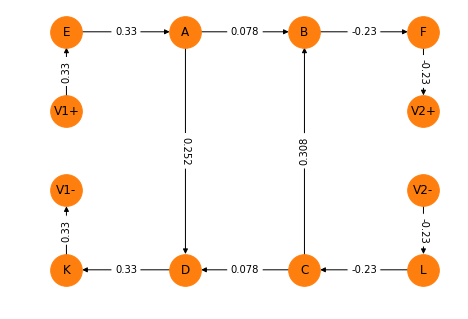

In [65]:
G2 = nx.DiGraph(); G2.add_nodes_from(positions); G2.add_edges_from(node_links); G2.out_degree()
shortest_path_v1 = nx.dijkstra_path(G2,'V1+', 'V1-')
shortest_path_v2 = nx.dijkstra_path(G2,'V2-', 'V2+')
print('____________')
print('Shortest path for V1 = ', shortest_path_v1); print('Shortest path for V2 = ', shortest_path_v2)
print('____________')
edges = nx.number_of_edges(G2); print('Edges: ', edges); print('____________')
info_A = nx.info(G2,'A'); info_B = nx.info(G2,'B'); info_C = nx.info(G2,'C'); info_D = nx.info(G2,'D')
print(info_A); print('____________')
print(info_B); print('____________')
print(info_C); print('____________')
print(info_D); print('____________')


nx.draw(G2, positions, node_color = 'C1', node_shape = 'o', node_size = 1000, with_labels = True)
nx.draw_networkx_edge_labels(G2, positions, edge_labels = node_links);

As we can see, we have the following correct result for this equation:
$$i_1 - i_2 - i_3 = 0$$
$$i_2 - i_4 - i_5 = 0$$

#### Notation!
Here we have only 4 nodes **(A,B,C,D)**, and 4 branches **(E, F, L, K)**

### Now we can change the direction of the current to find out if our calculations are correct.

____________
Shortest path for V1 =  ['V1-', 'K', 'D', 'A', 'E', 'V1+']
Shortest path for V2 =  ['V2+', 'F', 'B', 'C', 'L', 'V2-']
____________
Edges:  12
____________
Node A has the following properties:
Degree: 3
Neighbors: E
____________
Node B has the following properties:
Degree: 3
Neighbors: A C
____________
Node C has the following properties:
Degree: 3
Neighbors: L
____________
Node D has the following properties:
Degree: 3
Neighbors: A C
____________


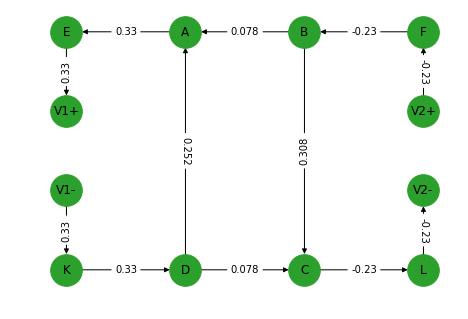

In [66]:
G3 = nx.reverse_view(G2)
nx.draw(G3, positions, node_color = 'C2', node_shape = 'o', node_size = 1000, with_labels = True)
nx.draw_networkx_edge_labels(G3, positions, edge_labels = node_links);
shortest_path_v1 = nx.dijkstra_path(G3,'V1-', 'V1+')
shortest_path_v2 = nx.dijkstra_path(G3,'V2+', 'V2-')
print('____________')
print('Shortest path for V1 = ', shortest_path_v1); print('Shortest path for V2 = ', shortest_path_v2)
print('____________')
edges = nx.number_of_edges(G2); print('Edges: ', edges); print('____________')
info_A = nx.info(G3,'A'); info_B = nx.info(G3,'B'); info_C = nx.info(G3,'C'); info_D = nx.info(G3,'D')
print(info_A); print('____________')
print(info_B); print('____________')
print(info_C); print('____________')
print(info_D); print('____________')

# Sources

1. https://simple.wikipedia.org/wiki/Electrical_circuit
2. https://networkx.github.io/documentation/stable/index.html
3. http://scask.ru/r_book_grnet.php?id=93